In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import time  
from matplotlib.animation import FFMpegWriter 
from PIL import Image 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

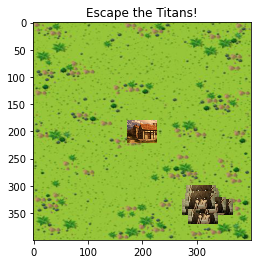

In [14]:
def getImage(img, zoom):
    return OffsetImage(plt.imread(img), zoom=zoom)    

class Titan:
    def __init__(self, name, locationX, locationY, image):
        self.name = name 
        self.locationX = locationX
        self.locationY = locationY  
        self.image = image

fig, ax = plt.subplots()
metadata = dict(title='My first animation in 3D', artist='Matplotlib',comment='Wakanda is here now.')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)
img = plt.imread("aot_grass.jpeg") 
ax.imshow(img)  
house_img = AnnotationBbox(getImage("house_aot.png", 0.3), (200, 200), frameon=False) 
ax.add_artist(house_img)
titan_array = [] 
for i in range(0,10):   
    spawn = np.random.randint(0, 2)
    if spawn:
        locationX = np.random.randint(300,350) 
        locationY = np.random.randint(300, 350)  
    # else:
    #     locationX = np.random.randint(300,400) 
    #     locationY = np.random.randint(300, 400) 
    titan_img = AnnotationBbox(getImage("aot_resize.jpeg", 0.3), (locationX, locationY), frameon=False)  
    titan = Titan(1, locationX, locationY, titan_img) 
    titan_array.append(titan) 
for i in titan_array:
    ax.add_artist(i.image)  
end = time.time() + 10 
cont = True
loc = np.arange(175, 225)  
ax.title.set_text("Escape the Titans!")
with writer.saving(fig, "aot_4final.mp4", dpi=200):
    while time.time() < end and cont:  
        for i in titan_array:
            if i.locationX in loc and i.locationY in loc: 
                cont = False   
                lost_time = time.time()
                ax.title.set_text("You Lose!")
                break 
            if i.locationX < 0 or i.locationX > 400 or i.locationY < 0 or i.locationY > 400: 
                i.locationX = np.random.randint(0, 50)
                i.locationY = np.random.randint(0, 50)
            else:  
                if i.locationX < 150:
                    i.locationX += np.random.randint(0, 10) 
                else:
                    i.locationX += np.random.randint(-10, 10)
                if i.locationY < 150:
                    i.locationY += np.random.randint(0, 10)
                else:
                    i.locationY += np.random.randint(-10,10) 
            i.image.remove() 
            i.image = AnnotationBbox(getImage("aot_resize.jpeg", 0.3), (i.locationX, i.locationY), frameon=False)
            ax.add_artist(i.image)  
        plt.show()
        writer.grab_frame() 
    if time.time() >= end:
        ax.title.set_text("You Win!") 
        writer.grab_frame() 